## Dataset Generation

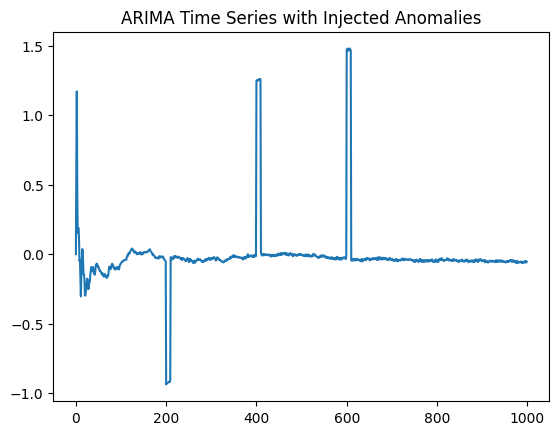

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def generate_arima_series(length=1000, order=(1,1,1)):
    arima_model = ARIMA(np.random.randn(length), order=order)
    arima_results = arima_model.fit()
    return arima_results.fittedvalues

def inject_anomaly(data, start, end, anomaly_type):
    if anomaly_type == "spike":
        data[start:end] += np.random.randn() * 1.5
    elif anomaly_type == "drop":
        data[start:end] -= np.random.randn() * 1.5
    elif anomaly_type == "level_shift":
        data[start:end] += 1.5
    return data

time_series_data = generate_arima_series()
time_series_data = inject_anomaly(time_series_data, 200, 210, "spike")
time_series_data = inject_anomaly(time_series_data, 400, 410, "drop")
time_series_data = inject_anomaly(time_series_data, 600, 610, "level_shift")

plt.plot(time_series_data)
plt.title("ARIMA Time Series with Injected Anomalies")
plt.show()


## Algorithm Execution

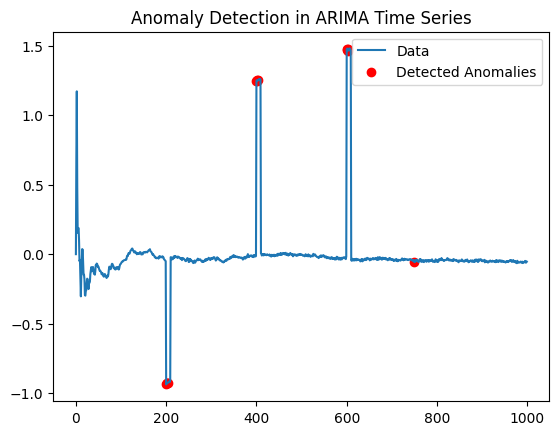

In [24]:
def detect_anomalies(data, window_size=50, sensitivity=3):
    detected_anomalies = []
    rolling_mean = data.rolling(window=window_size).mean()
    rolling_std = data.rolling(window=window_size).std()

    for i in range(window_size, len(data)):
        if abs(data[i] - rolling_mean[i]) > sensitivity * rolling_std[i]:
            detected_anomalies.append(i)

    return detected_anomalies

time_series_data = pd.Series(time_series_data)  
detected_indices = detect_anomalies(time_series_data)
plt.plot(time_series_data, label="Data")
plt.scatter(detected_indices, time_series_data[detected_indices], color='red', label="Detected Anomalies")
plt.title("Anomaly Detection in ARIMA Time Series")
plt.legend()
plt.show()
